# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
normal      10000 non-null float64
binomial    10000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 156.3 KB


In [6]:
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [7]:
#Verificando se há dados nulos
dataframe.isna().sum()

normal      0
binomial    0
dtype: int64

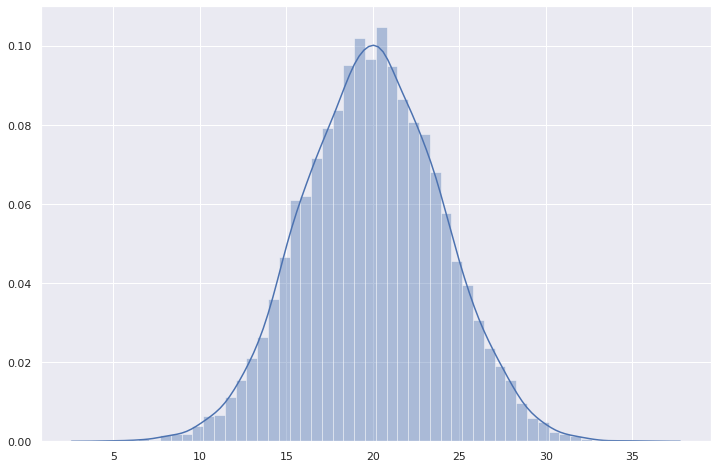

In [8]:
# Distribuição Gaussiana
normal = sct.norm.rvs(20, 4, size=10000) 
sns.distplot(normal);

In [9]:
#Verificando a média e variância
(normal.mean(), normal.var())

(19.98309517796638, 15.712022241587686)

In [10]:
#Verificando o Desvio Padrão
normal.std()

3.9638393309501945

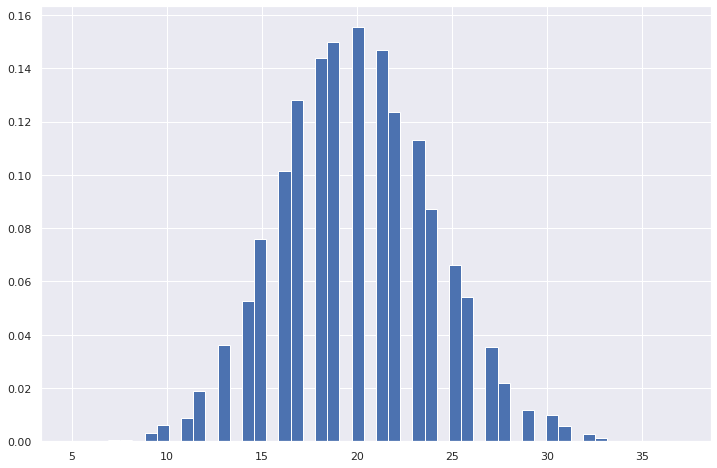

In [11]:
# Distribuição Binomial
binomial = sct.binom.rvs(100, 0.2, size=10000)
plt.hist(binomial, density = True, bins = 50)
plt.show()

In [12]:
#Verificando a média e a variância
(binomial.mean(), binomial.var())

(19.984, 16.220943999999996)

In [13]:
# Verificando o desvio padrão
binomial.std()

4.027523308436588

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [14]:
def q1():
    # Retorne aqui o resultado da questão 1.
    normal = np.percentile(dataframe.normal, [25, 50, 75])
    binomial = np.percentile(dataframe.binomial, [25, 50, 75])
    return (round(normal[0]-binomial[0], 3),round(normal[1]-binomial[1], 3),round(normal[2]-binomial[2], 3))
q1()

(0.31, -0.01, -0.316)

In [ ]:
dataframe.normal.mean()

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [15]:
def q2():
    #Distribuição acumulada empírica
    dist_empirica = ECDF(dataframe.normal)
    
    #Calculando a média
    media = dataframe.normal.mean()
    
    # Calculando o desvio padrão
    desvio_padrao = dataframe.normal.std()
    
    # Calculando os limites da fórmula
    limite_superior = dist_empirica(media + desvio_padrao)
    limite_inferior = dist_empirica(media - desvio_padrao)
    
    return float(np.round(limite_superior - limite_inferior, 3))

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [16]:
def q3():  
    # Calculando parâmetros para distribuição normal
    media_normal = dataframe.normal.mean()
    variancia_normal = dataframe.normal.var()
    
    # Calculando parâmetros para distribuição binomial
    media_binomial = dataframe.binomial.mean()
    variancia_binomial = dataframe.binomial.var()
    
    # Diferenças entre as médias
    dif_media = media_binomial - media_normal
    
    # Diferença entre as variâncias
    dif_variancia = variancia_binomial - variancia_normal
    
    resultado = (round( dif_media, 3), round(dif_variancia, 3))
    
    return tuple(resultado)

q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [17]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [18]:
# Sua análise da parte 2 começa aqui.
#Verificando informações sobre o Dataframe
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [19]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [20]:
#Verificando se existem dados faltantes
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

In [21]:
#Estatística descritiva do Dataframe
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [22]:
def q4():
    # Filtrando os dados
    nova_variavel = stars[stars['target'] == 0]['mean_profile']
    
    # Padronizando os dados para normal padrão
    false_pulsar_mean_profile_standardized = (nova_variavel - nova_variavel.mean())/nova_variavel.std()

    # Calculando a distribuição empirica
    dist_empirica = ECDF(false_pulsar_mean_profile_standardized)
    
    # Quantis na distribuicao normal
    quantis = sct.norm.ppf([.8, .9, .95])
    
    # Calculo de propabilidade
    return tuple(np.round(dist_empirica(quantis),3))
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [23]:
def q5():
    # Quantis = 25, 50 e 75
    quantis = [.25, .5, .75]
    
    # Filtrando os dados
    nova_variavel = stars[stars['target'] == 0]['mean_profile']
    
    # Padronizando os dados para normal padrão
    false_pulsar_mean_profile_standardized = (nova_variavel - nova_variavel.mean())/nova_variavel.std()
    
    # Quantis da distribuição
    quantis_empiricos = false_pulsar_mean_profile_standardized.quantile(quantis)
    
    # Quantis teoricos
    quantis_teoricos = sct.norm.ppf(quantis)
    
    return tuple(np.round(quantis_empiricos - quantis_teoricos, 3))
    
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.